<a href="https://colab.research.google.com/github/SimonT2003/MAT421/blob/main/MAT421_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Regression Analysis Approach for Predicting the Presence of Heart Disease

### By Simon Tran, MAT 421
#### March 3, 2024

## **Introduction**

***Heart disease*** is a term that describes a range of conditions that affect the heart.

By the Mayo Clinic, heart diseases include:
*   Blood vessel disease, such as coronary atery disease
*   Heart valve disease
*   Heart muscle disease
*   Irregular heartbeats
*   Heart defects

The most common type of heart disease in the U.S. is coronary artery disease. It affects the way blood flows to the heart.

Some of the symptoms of heart disease are **heart attack** (decreased blood flow to the heart), **arrhythmia** (palpitations), and **heart failure**. For heart attack, a patient may feel chest pain or discomfort, pain in the upper back or neck, heartburn, faitgue, etc. For heart failure, a patient may feel shortness of breath, or possible swelling of their feet, ankles, abdomen, etc.

It is important to prioritize health and watch for any symptoms. A patient would actually be diagnosed with a particular heart disease once they either have a heart attack, stroke, or heart failure. It's crucial to know the risk factors for heart disease; roughly about 47% of the U.S. population (from CDC) have high blood pressure, high blood cholesterol, and nicotine in their lungs. Some other risk factors may be obesity/overweight, diabetes, unhealthy diet, etc.

Preventative measure is key! Please make sure to choose a healthy diet, keep a healthy weight, not smoke, frequently exercise, and get regular checkups.



There are several ways to perform classification prediction on heart disease datasets, and the choice of method often depends on factors such as the nature of the data, the size of the dataset, and the specific goals of the analysis.

One popular and most common technique is ***logistic regression***. It is used for binary classification, and it models the probability of the binary outcome using a logistic function.

Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

Logit($π$) = log($\frac{π}{1-π}$) = $β_0 + β_1x_1+...+β_kx_k$


In this paper, we will develop a Logistic Regression model to try classifying a patient have heart disease or not.

## **Proposed Methodology**

We discuss the proposed work in this part, which encompasses several phases such as importing dataset, basic E.D.A, classification, logistic regression model, and analysis.

### **Dataset**

> The heart disease dataset comes from UC Irvine Machine Learning Repository.

> The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

> The dataset has 16 variables and 920 observations.

> There are missing values.

The variables that we'll use are:


*   age
*   origin (place of study)
*   sex
*   cp (chest pain)
*   trestbps (resting blood pressure)
*   chol (serum cholesterol in mg/dl)
*   fbs (if fasting blood sugar > 120 mg/dl)
*   restecg (resting electrocardiographic results)
*   thalach (maximum heart rate achieved)
*   exang: exercise-induced angina (True/ False)
*   oldpeak: ST depression induced by exercise relative to rest
*   slope: the slope of the peak exercise ST segment
*   ca: number of major vessels (0-3) colored by fluoroscopy
*   thal: [normal; fixed defect; reversible defect]
*   num: the predicted attribute



## **Basic EDA**

> We will discuss the basic explanorty data analysis below.

We will run this experiment in Python.

In [79]:
# import dependencies
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

%matplotlib inline

In [80]:
# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/SimonT2003/MAT421/main/heart_disease_uci.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

print(df.shape)

print(list(df.columns))

(920, 16)
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [81]:
# Printing out the first 5 rows of the dataframe
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [82]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


It looks like our data does contain missing values. Let's see if removing the rows with missing values will be beneficial. Then, we will shuffle the dataset in order to have a uniform distribution when we split them into train and test dataset.

In [83]:
df.dropna(inplace = True)
from sklearn.utils import shuffle
data = shuffle(df)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 56 to 129
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


After handling the missing values, we can simply do a data visualization before we start with machine learning model.

### **Age Distribution:**

In [87]:
fig = go.Figure()
fig.add_trace(go.Box(y=df[data['sex']=='Male']['age'].values, name ='Male only', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=df[data['sex']=='Female']['age'].values, name ='Female only', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'Age Distribution Between Genders', yaxis_title = 'Age (yrs)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

<ipython-input-87-d1b21611d1c5>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-87-d1b21611d1c5>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



### **Histogram of Age:**

In [88]:
group_labels = ['Age Distribution'] # name of the dataset
fig = ff.create_distplot([df.age], group_labels)
fig.update_layout(title = 'Age Distribution(all)', yaxis_title = 'Propotion', xaxis_title = 'Age (yrs)', title_x = 0.5)
fig.show()

### **Male and Female Proportions:**

In [89]:
df=df['sex'].value_counts().reset_index().rename(columns={'index':'sex','sex':'count'})
fig = go.Figure([go.Pie(labels=['Male', 'Female'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Male to Female ratio in the study",title_x=0.5)
fig.show()

### **Chest Pain Type Propotions:**

In [90]:
df=data['cp'].value_counts().reset_index().rename(columns={'index':'cp','cp':'count'})
fig = go.Figure([go.Pie(labels=df['cp'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Chest Pain Conditions",title_x=0.5)
fig.show()

### **Resting Blood Pressure vs Gender:**

In [91]:
fig = go.Figure()
fig.add_trace(go.Box(y=data[data['sex']=='Male']['trestbps'].values, name ='Male only', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=data[data['sex']=='Female']['trestbps'].values, name ='Female only', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'Blood Pressure Distribution', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

### **Resting Blood Prssure vs Disease:**

In [92]:
fig = go.Figure()
fig.add_trace(go.Box(y=data[data['num']== 0]['trestbps'].values, name ='No Disease', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=data[data['num'] !=0]['trestbps'].values, name ='Heart Disease', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'BP Distribution (at rest)', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

### **Cholesterol Level Distribution:**

In [95]:
fig = go.Figure()
fig.add_trace(go.Violin(y=data[data['num']== 0]['chol'].values, name ='No Disease', marker_color = 'blue'))
fig.add_trace(go.Violin(y=data[data['num'] ==4]['chol'].values, name ='Heart Disease', marker_color = 'red'))
fig.update_layout(title = 'Cholesterol Level Distribution', yaxis_title = 'Cholesterol Level (mg/dL)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

## **Classification**

In [96]:
data.head(30)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
56,57,50,Male,Cleveland,non-anginal,140.0,233.0,False,normal,163.0,False,0.6,flat,1.0,reversable defect,1
225,226,34,Female,Cleveland,atypical angina,118.0,210.0,False,normal,192.0,False,0.7,upsloping,0.0,normal,0
89,90,51,Female,Cleveland,non-anginal,130.0,256.0,False,lv hypertrophy,149.0,False,0.5,upsloping,0.0,normal,0
46,47,51,Male,Cleveland,non-anginal,110.0,175.0,False,normal,123.0,False,0.6,upsloping,0.0,normal,0
196,197,69,Male,Cleveland,typical angina,160.0,234.0,True,lv hypertrophy,131.0,False,0.1,flat,1.0,normal,0
217,218,46,Female,Cleveland,asymptomatic,138.0,243.0,False,lv hypertrophy,152.0,True,0.0,flat,0.0,normal,0
144,145,58,Male,Cleveland,non-anginal,105.0,240.0,False,lv hypertrophy,154.0,True,0.6,flat,0.0,reversable defect,0
162,163,54,Female,Cleveland,non-anginal,110.0,214.0,False,normal,158.0,False,1.6,flat,0.0,normal,0
251,252,58,Male,Cleveland,asymptomatic,146.0,218.0,False,normal,105.0,False,2.0,flat,1.0,reversable defect,1
103,104,71,Female,Cleveland,non-anginal,110.0,265.0,True,lv hypertrophy,130.0,False,0.0,upsloping,1.0,normal,0


### **Pre-Processing:**

If we just look at the data, we will see some of the features have categorical values. So we have to do one hot encoding for them. Also the original dataset contains the target as 0, 1, 2, 3, 4. But for identifying simply the presence of disease, we will take binary classification. With that view in mind, we will covert all the target features in the num column into 1/0.

In [97]:
# In some of the features, there is space will will create problem later on.
# So we rename those attributes to handle problems in the future.

# data["restecg"].replace({"lv hypertrophy": "lv_hypertrophy","st-t abnormality": "stt_abnormality" }, inplace=True)
data['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
data['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)


data_tmp = data[['age','sex','cp', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
data_tmp['target'] = ((data['num'] > 0)*1).copy()
data_tmp['sex'] = (data['sex'] == 'Male')*1
data_tmp['fbs'] = (data['fbs'])*1
data_tmp['exang'] = (data['exang'])*1

data_tmp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
              'cholesterol', 'fasting_blood_sugar',
              'max_heart_rate_achieved', 'exercise_induced_angina',
              'st_depression', 'st_slope_type', 'num_major_vessels',
              'thalassemia_type', 'target']
data_tmp.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
56,50,1,non-anginal,140.0,233.0,0,163.0,0,0.6,flat,1.0,reversable_defect,1
225,34,0,atypical_angina,118.0,210.0,0,192.0,0,0.7,upsloping,0.0,normal,0
89,51,0,non-anginal,130.0,256.0,0,149.0,0,0.5,upsloping,0.0,normal,0
46,51,1,non-anginal,110.0,175.0,0,123.0,0,0.6,upsloping,0.0,normal,0
196,69,1,typical_angina,160.0,234.0,1,131.0,0,0.1,flat,1.0,normal,0
217,46,0,asymptomatic,138.0,243.0,0,152.0,1,0.0,flat,0.0,normal,0
144,58,1,non-anginal,105.0,240.0,0,154.0,1,0.6,flat,0.0,reversable_defect,0
162,54,0,non-anginal,110.0,214.0,0,158.0,0,1.6,flat,0.0,normal,0
251,58,1,asymptomatic,146.0,218.0,0,105.0,0,2.0,flat,1.0,reversable_defect,1
103,71,0,non-anginal,110.0,265.0,1,130.0,0,0.0,upsloping,1.0,normal,0


### **One-Hot Encoding:**

In [98]:
data = pd.get_dummies(data_tmp, drop_first=False)
data.columns

<ipython-input-98-698adc0b2566>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-98-698adc0b2566>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina', 'fasting_blood_sugar_0',
       'fasting_blood_sugar_1', 'exercise_induced_angina_0',
       'exercise_induced_angina_1', 'st_slope_type_downsloping',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_fixed_defect', 'thalassemia_type_normal',
       'thalassemia_type_reversable_defect'],
      dtype='object')

## **Logistic Regression Model**

let us separate the input and labels for the dataset and thus we will be able to put them in the training models.

In [99]:
from sklearn.model_selection import train_test_split
y = data['target']
X = data.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (239, 21)
Shape of y_train: (239,)
Shape of X_test: (60, 21)
Shape of y_test: (60,)


### **Normalization**

Min-Max Normalization method is used to Normalize the data. This method scales the data range to [0,1]. Standardization is also used on a feature-wise basis in most cases. Normalization is done by the following formula.

$x_{scaled}=\frac{(x-x_{min})}{(x_{max}-x_{min})}$

In [100]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.

In [101]:
X_test

,age,sex,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non-anginal,...,fasting_blood_sugar_0,fasting_blood_sugar_1,exercise_induced_angina_0,exercise_induced_angina_1,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed_defect,thalassemia_type_normal,thalassemia_type_reversable_defect
64,0.595238,1.0,0.205479,0.299320,0.160377,0.225806,0.333333,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
748,0.642857,1.0,0.205479,0.000000,0.226415,0.241935,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
26,0.690476,0.0,0.205479,0.816327,0.716981,0.000000,0.000000,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
244,0.738095,0.0,0.205479,0.265306,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
194,0.928571,0.0,0.205479,0.377551,0.179245,0.241935,0.000000,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
23,0.690476,1.0,0.369863,0.421769,0.726415,0.516129,0.666667,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
182,0.309524,1.0,0.589041,0.489796,0.773585,0.129032,0.666667,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
111,0.642857,1.0,0.273973,0.506803,0.452830,0.193548,0.333333,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
260,0.357143,0.0,0.178082,0.482993,0.500000,0.048387,0.333333,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51,0.857143,1.0,0.205479,0.261905,0.415094,0.064516,0.000000,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### **Fitting Into the Regression Model:**

In [102]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

### **Prediction**

In [103]:
y_pred = logre.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred):
    actual.append(i)
    predcition.append(j)

dic = {'Actual':actual,
       'Prediction':predcition }

result  = pd.DataFrame(dic)
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,    mode='markers',  name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,  mode='markers',  name='Pred'))

In the above figure, the red dots represent the predicted values that is either 0 or 1 and the blue line & and dot represents the actual value of that particular patient. In the places where the red dot and blue dot do not overlap are the wrong predictions and where the both dots overlap those are the right predicted values.

### **Model Evaluation**

#### **Accuracy**

In [111]:
from sklearn.metrics import accuracy_score
print('The Accuracy Score is: ', accuracy_score(y_test,y_pred))

The Accuracy Score is:  0.8166666666666667


#### **Precision, Recall, F1-Score, Support**

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.74      0.88      0.81        26

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



#### **Confusion Matrix**

[[26  8]
 [ 3 23]]


<Axes: >

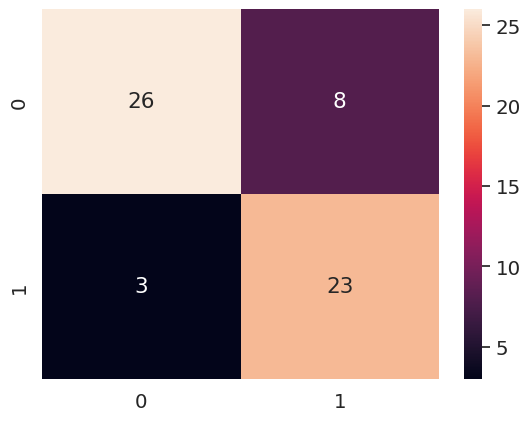

In [106]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

#### **Area under ROC and ROC Curve**

In [109]:
import sklearn
print('Area Under ROC-Curve: ', sklearn.metrics.roc_auc_score(y_test,y_pred))

Area Under ROC-Curve:  0.8246606334841627


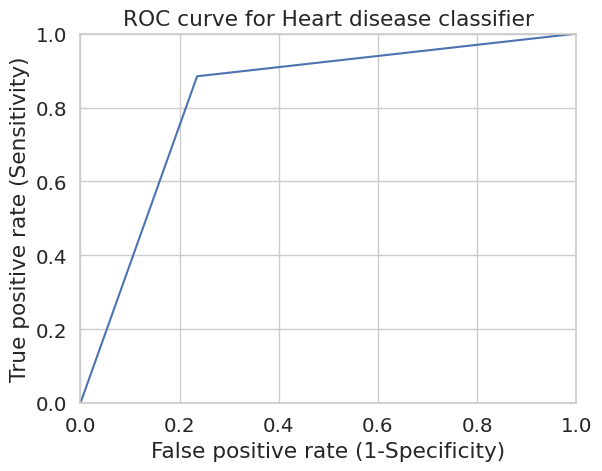

In [108]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate = False)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

## **Analysis**

### **Coefficients**

Linear Regression actually calculates the total outcome by summing up the weighted sum of the different features. Let's have a look at those weights.

In [110]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[-2.13132878]


,Coeffecient
num_major_vessels,2.519847
resting_blood_pressure,1.387389
st_depression,1.074493
sex,0.989045
thalassemia_type_reversable_defect,0.942545
chest_pain_type_asymptomatic,0.860726
age,0.658284
cholesterol,0.621992
st_slope_type_flat,0.446056
exercise_induced_angina_1,0.390980


<Figure size 1000x1200 with 0 Axes>

## **Conclusion**



*   The Area under the ROC curve is above 80% which is somewhat satisfactory.
*   The model predicted with 81.7% accuracy. The model is more specific than sensitive.
*   According to this model the major features contributing in precision of predicting model are shown in the heatmap in Ascending order.





##**Data Availability**

https://archive.ics.uci.edu/dataset/45/heart+disease

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## **Resources**

https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

https://www.cdc.gov/heartdisease/prevention.htm

https://www.kaggle.com/code/redwankarimsony/uci-heart-disease-eda-classification-analysis#Part-2:-Classification